In [1]:
'''
Date: 13/Feb/2023
Aim: prove the feasibility of background subtraction
Author: Yike Xie
'''

'\nDate: 13/Feb/2023\nAim: prove the feasibility of background subtraction\nAuthor: Yike Xie\n'

In [2]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import h5py
import cv2
from operator import *

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.path import Path
from matplotlib import patches
from PIL import Image

import seaborn as sns
import time

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
wls =[
 (325, 414),
 (343, 414),#
 (370, 414),
 (343, 451),
 (370, 451),
 (373, 451),
 (343, 575),#
 (393, 575),
 (406, 575),
 (441, 575),
 (400, 594),
 (406, 594),
 (431, 594),
 (480, 594),#
 (339, 575),
]

'''
fd = '/home/yike/phd/cancer_cells_img_seq/data/20220201_imaging/control'

I've checked that all files in control, including cal, water and test, have the same channels as my samples
'''

"\nfd = '/home/yike/phd/cancer_cells_img_seq/data/20220201_imaging/control'\n\nI've checked that all files in control, including cal, water and test, have the same channels as my samples\n"

In [10]:
path = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/figures/'

fns = ['Test-1.npz', 'Test-2.npz', 
       'Cal-2.npz', 'Cal-3.npz', 
       'Water-1.npz', 'Water-2.npz',
       'C3_S1.npz', 'F11_S108.npz']

imgs = {fn.split('.')[0]: np.load(os.path.join(path, fn)) for fn in fns}

In [19]:
datas = {}

for name, tmpt in imgs.items():
    datas[name] = {}
    for file in imgs['Test-1'].files:
        y = np.bincount(tmpt[file].ravel())
        datas[name][file] = y

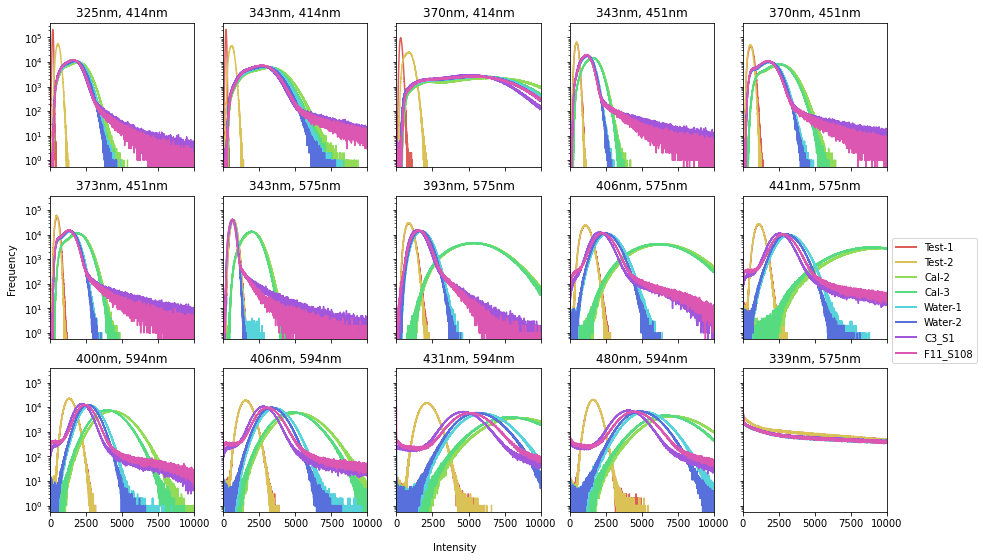

In [27]:
# real number
colors = sns.color_palette('hls', len(datas))
title = 'distribution.png'

from matplotlib.lines import Line2D
fig, axs = plt.subplots(3, 5, figsize=(15, 9), sharex=True, sharey=True)

axs = axs.ravel()
handles = []
for i, wl in enumerate(wls):
    for j, (name, img) in enumerate(datas.items()): # [water, water, sample]
        y = datas[name][f'wls_{wl[0]}_{wl[1]}']
        x = range(len(y))
        axs[i].plot(x, y, color=colors[j])
        axs[i].set_title(f'{wl[0]}nm, {wl[1]}nm')
        handles.append(Line2D([], [], color=colors[j], lw=2))
        
#     axs[i].set_xscale('log')
    axs[i].set_xlim(0, 10000)
    axs[i].set_yscale('log')

axs[-1].legend(labels=datas.keys(), handles=handles, 
               bbox_to_anchor=[1, 1])

fig.text(0.5, 0.07, 'Intensity', va='center', ha='center')
fig.text(0.09, 0.5, 'Frequency', va='center', ha='center', rotation=90)

if title is not False:
    fig.savefig('/home/yike/phd/cancer_cells_img_seq/figures/background_subtraction/{}'.format(title), 
                dpi=150, bbox_inches='tight')

In [7]:
def plot_ctl(img):
    fig, axs = plt.subplots(3, 5)
    axs = axs.ravel()
    for i in range(img.shape[0]):
        data = (img[i] - img[i].min()) / (img[i].max() - img[i].min())
        axs[i].imshow(data)
        axs[i].axis('off')

Read metadata about excitation/emission lambdas
Read image data
Time: 4.941932439804077


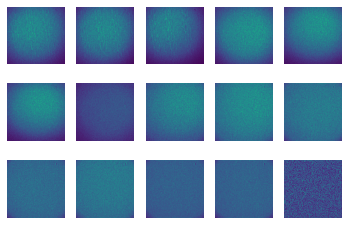

In [8]:
plot_ctl(img1)

Read metadata about excitation/emission lambdas
Read image data
Time: 3.6779215335845947


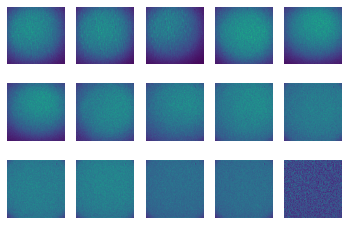

In [9]:
plot_ctl(img2)

Read metadata about excitation/emission lambdas
Read image data
Time: 5.437806844711304


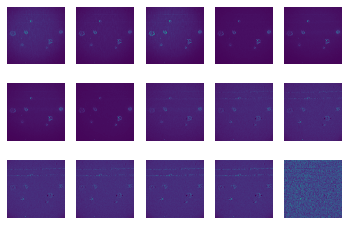

In [10]:
plot_ctl(img3)

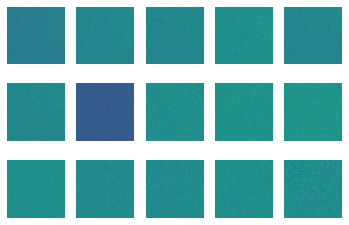

In [13]:
# background subtraction with normalization: water1 by water 2
fig, axs = plt.subplots(3, 5)
axs = axs.ravel()
for i in range(img.shape[0]):
    tmpt = img1[i] - img2[i]
    
    data = (tmpt - tmpt.min()) / (tmpt.max() - tmpt.min())
    axs[i].imshow(data)
    axs[i].axis('off')

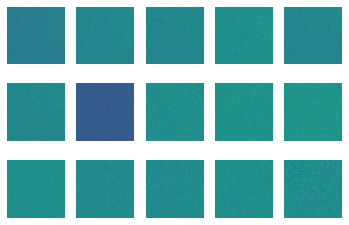

In [14]:
# background subtraction without normalization: water1 by water 2
fig, axs = plt.subplots(3, 5)
axs = axs.ravel()
for i in range(img.shape[0]):
    tmpt = img1[i] - img2[i]
    axs[i].imshow(tmpt)
    axs[i].axis('off')

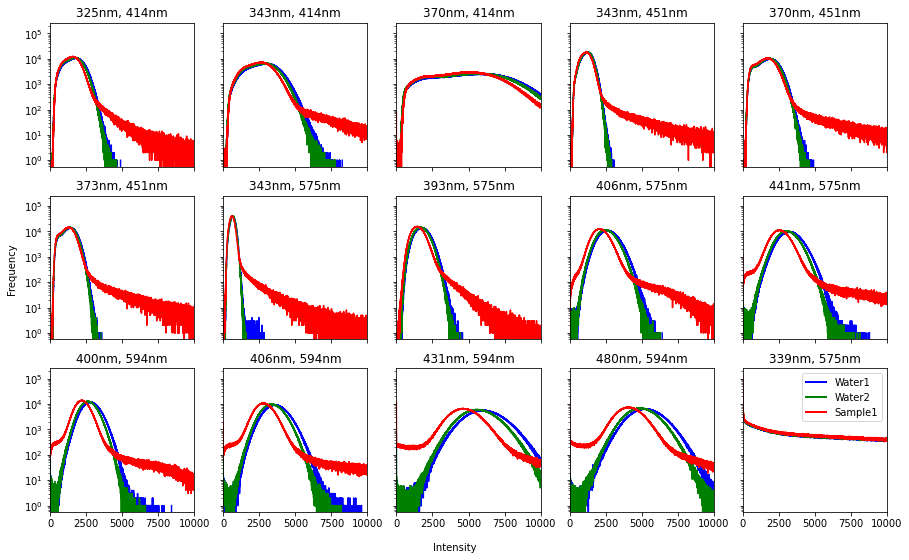

In [63]:
# real number
fig, axs = plt.subplots(3, 5, figsize=(15, 9), sharex=True, sharey=True)

axs = axs.ravel()
handles = []
for i, wl in enumerate(wls):
    for name, color in zip(['img1', 'img2', 'img3'], ['blue', 'green', 'red']): # [water, water, sample]
        y = datas[name, f'{wl[0]} {wl[1]}']
        x = range(len(y))
        axs[i].plot(x, y, color=color)
        axs[i].set_title(f'{wl[0]}nm, {wl[1]}nm')
        handles.append(Line2D([], [], color=color, lw=2))
        
#     axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlim(0, 10000)
    
axs[-1].legend(labels=['Water1', 'Water2', 'Sample1'], handles=handles, 
               bbox_to_anchor=[1, 1])

fig.text(0.5, 0.07, 'Intensity', va='center', ha='center')
fig.text(0.09, 0.5, 'Frequency', va='center', ha='center', rotation=90)

fig.savefig('/home/yike/phd/cancer_cells_img_seq/figures/background_subtraction/intensity_abundance2.png', 
            dpi=150, bbox_inches='tight')

In [12]:
def show(img):
    fig, axs = plt.subplots(3, 5)
    axs = axs.ravel()
    for i in range(img.shape[0]):
    #     data = (img[i] - img[i].min()) / (img[i].max() - img[i].min())
        print(img[i].max())
        axs[i].imshow(img[i], vmax=100000)
        axs[i].axis('off')

Read metadata about excitation/emission lambdas
Read image data
420.0
390.0
1094.0
1129.0
1427.0
1166.0
1676.0
2264.0
2826.0
2790.0
3151.0
3863.0
6105.0
5152.0
26630.401109695435


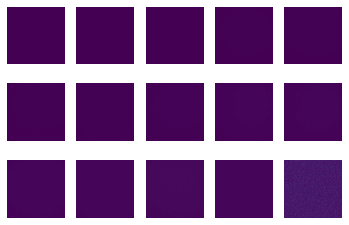

In [11]:
res = read_image('/home/yike/phd/cancer_cells_img_seq/data/20220201_imaging/control/Test-1.mat')
img = res['data']
show(img)

Read metadata about excitation/emission lambdas
Read image data
4888.0
8249.0
18644.0
3087.0
4910.0
3595.0
2837.0
4586.0
6420.0
8785.0
8421.0
9591.0
20595.0
17488.0
55165.19404220581


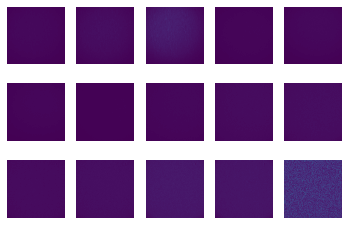

In [13]:
res = read_image('/home/yike/phd/cancer_cells_img_seq/data/20220201_imaging/control/Water-1.mat')
img2 = res['data']

show(img2)

Read metadata about excitation/emission lambdas
Read image data
5083.0
8365.0
20440.0
568.0
1422.0
1710.0
4992.0
14292.0
18239.0
25548.0
10779.0
12897.0
24139.0
19742.0
52299.63246536255


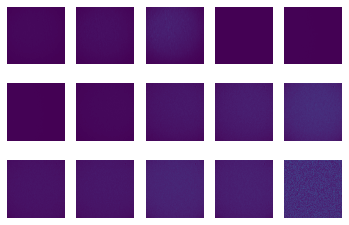

In [14]:
res = read_image('/home/yike/phd/cancer_cells_img_seq/data/20220201_imaging/control/Cal-1.mat')
img3 = res['data']

show(img3)

Read metadata about excitation/emission lambdas
Read image data
1647.0
1359.0
2049.0
1155.0
1305.0
1084.0
1752.0
2096.0
3086.0
2714.0
3078.0
3716.0
5589.0
5556.0
1728.355492591858


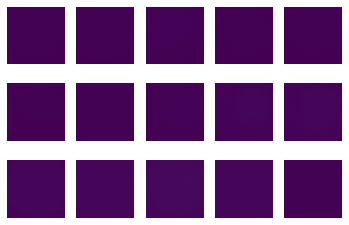

In [15]:
res = read_image('/home/yike/phd/cancer_cells_img_seq/data/20220201_imaging/control/-1-1-1.mat')
img3 = res['data']

show(img3)

In [ ]:
res = read_image('/home/yike/phd/cancer_cells_img_seq/data/20220201_imaging/control/Cal-1.mat')
img = res['data']

fig, axs = plt.subplots(3, 5)
axs = axs.ravel()
for i in range(img.shape[0]):
#     data = (img[i] - img[i].min()) / (img[i].max() - img[i].min())
    axs[i].imshow(img[i], vmax=100000)
    axs[i].axis('off')

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/skimage/_shared/utils.py:348: UserWarning: image is size 3 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  return func(*args, **kwargs)


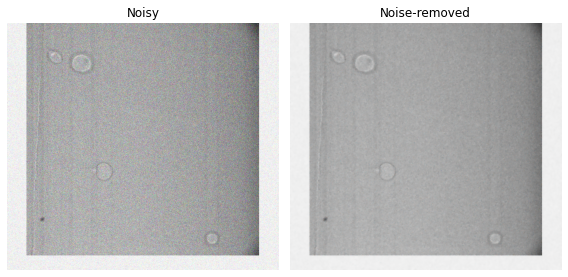

In [5]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage import io

img =  io.imread('/home/yike/Desktop/dish2_M6.png')


original = img_as_float(img)

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

sigma_est = estimate_sigma(noisy, average_sigmas=True)

ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('Noisy')
ax[1].imshow(denoise_tv_chambolle(noisy, weight=0.1))
ax[1].axis('off')
ax[1].set_title('Noise-removed')


fig.tight_layout()

plt.show()

In [6]:
import skimage.data
from skimage import img_as_float
img = img_as_float(skimage.data.camera())
sigma = 0.1
rng = np.random.default_rng()
img = img + sigma * rng.standard_normal(img.shape)
sigma_hat = estimate_sigma(img, channel_axis=None)

In [7]:
sigma_hat

0.10198628384161962